In [1]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_nf016 = pd.read_csv("./data/redflags_analysis/nf016.csv")
df_nf017 = pd.read_csv("./data/redflags_analysis/nf017.csv").iloc[:, [1,2,4]]
df_nf019 = pd.read_csv("./data/redflags_analysis/nf019.csv")
df_nf062 = pd.read_csv("./data/redflags_analysis/nf062.csv")

df_nf016.columns = ["ruc", "ocid", "NF016"]
df_nf017.columns = ["ocid", "ruc", "NF017"]
df_nf019.columns = ["ocid", "ruc", "NF019"]
df_nf062.columns = ["ocid", "ruc", "NF062"]

In [3]:
df_nf016

,ruc,ocid,NF016
0,EC-RUC-1768154690001-741823,ocds-5wno2w-RE-EPMMOP-009-2019-741823,1.0
1,EC-RUC-1760000310001-1468,ocds-5wno2w-RE-PR-006-2019-1468,1.0
2,EC-RUC-1768152560001-236009,ocds-5wno2w-RE-CNTEP-132141-19-236009,1.0
3,EC-RUC-1768152560001-236009,ocds-5wno2w-RE-CNTEP-132150-19-236009,1.0
4,EC-RUC-1760000310001-1468,ocds-5wno2w-RE-PR-019-2019-1468,1.0
...,...,...,...
88451,EC-RUC-1760001040001-2550,ocds-5wno2w-CE-20220002288318-18362,0.0
88452,EC-RUC-1760001120001-2455,ocds-5wno2w-MCO-GADPCANI-5-2022-126094,0.0
88453,EC-RUC-0968587600001-318319,ocds-5wno2w-CE-20220002288524-41357,0.0
88454,EC-RUC-1768132370001-24327,ocds-5wno2w-CE-20220002288583-79844,0.0


In [4]:
df_nf017

,ocid,ruc,NF017
0,ocds-5wno2w-MCO-GADPEO-Q-09-2018-17250,EC-RUC-0705215606001-585014,1
1,ocds-5wno2w-MCO-GADPO-111COP-18-29112,EC-RUC-1310092018001-37975,1
2,ocds-5wno2w-LICO-GADMCH-001-2019-43412,EC-RUC-1391844786001-784910,1
3,ocds-5wno2w-MCO-GADPRB-01-2019-110239,EC-RUC-0291518028001-879978,1
4,ocds-5wno2w-MCO-GADPO-001-2019-125195,EC-RUC-1103801864001-785041,1
...,...,...,...
468367,ocds-5wno2w-SIE-DDSPHTS-014-2022-101386,EC-RUC-1003020680001-886715,1
468368,ocds-5wno2w-REPUF-ISSFA-016-2022-2803,EC-RUC-0990018707001-4660,0
468369,ocds-5wno2w-SIE-HEJCA-F-300-2022-87497,EC-RUC-0990018707001-4660,0
468370,ocds-5wno2w-SIE-HEJCA-F-284-2022-87497,EC-RUC-1790233332001-41388,1


In [5]:
df_nf019

,ocid,ruc,NF019
0,ocds-5wno2w-SIE-GPA-001-2019-30745,EC-RUC-1791773268001-239301,1
1,ocds-5wno2w-SIE-GPA-004-2019-30745,EC-RUC-0190061884001-15260,0
2,ocds-5wno2w-SIE-GPA-009-2019-30745,EC-RUC-0103903399001-282302,1
3,ocds-5wno2w-SIE-GPA-011-2019-30745,EC-RUC-0101364107001-30471,1
4,ocds-5wno2w-SIE-GPA-012-2019-30745,EC-RUC-0102788635001-471993,1
...,...,...,...
36570,ocds-5wno2w-GADPRBM-001-SIE-2022-98091,EC-RUC-1804030516001-320197,0
36571,ocds-5wno2w-IESS-CSA-PIL003-2022-84345,EC-RUC-0291518281001-911245,0
36572,ocds-5wno2w-SIE-GADPRT-2022-003-141875,EC-RUC-2290350223001-1055231,0
36573,ocds-5wno2w-SIE-CCSL-002-2022-596563,EC-RUC-1590017414001-550710,0


In [6]:
df_nf062

,ocid,ruc,NF062
0,ocds-5wno2w-SIE-HGPT-ADM-02-18-2418,EC-RUC-0991259546001-24804,1
1,ocds-5wno2w-SIE-145-COG-18-2426,EC-RUC-1002434007001-293779,1
2,ocds-5wno2w-SIE-DS09D11-008-2018-130414,EC-RUC-1891713742001-26522,1
3,ocds-5wno2w-SIE-HPGDR-087-2018-14393,EC-RUC-0990021007001-1959,1
4,ocds-5wno2w-SIE-GPLR-0001-2019-2805,EC-RUC-1204927790001-781249,1
...,...,...,...
27224,ocds-5wno2w-SIE-GADMCV-012-2022-2578,EC-RUC-0990000689001-6084,1
27225,ocds-5wno2w-SIE-GADMIS-041-2022-24339,EC-RUC-1717288953001-448591,1
27226,ocds-5wno2w-SIE-HGI-44-2022-3260,EC-RUC-1792029678001-209299,0
27227,ocds-5wno2w-SIE-HMHA-021-2022-88059,EC-RUC-0991327541001-15807,0


In [7]:
df_nf017 = df_nf017.loc[0:36574]

In [8]:
df_nf017

,ocid,ruc,NF017
0,ocds-5wno2w-MCO-GADPEO-Q-09-2018-17250,EC-RUC-0705215606001-585014,1
1,ocds-5wno2w-MCO-GADPO-111COP-18-29112,EC-RUC-1310092018001-37975,1
2,ocds-5wno2w-LICO-GADMCH-001-2019-43412,EC-RUC-1391844786001-784910,1
3,ocds-5wno2w-MCO-GADPRB-01-2019-110239,EC-RUC-0291518028001-879978,1
4,ocds-5wno2w-MCO-GADPO-001-2019-125195,EC-RUC-1103801864001-785041,1
...,...,...,...
36570,ocds-5wno2w-LICO-GADMM-09-2021-28990,EC-RUC-0992418664001-60783,1
36571,ocds-5wno2w-LICO-GADMM-09-2021-28990,EC-RUC-0992418664001-60783,1
36572,ocds-5wno2w-LICO-GADMM-OP-06-021-28990,EC-RUC-0790093844001-21880,1
36573,ocds-5wno2w-LICO-GADMM-OP-06-021-28990,EC-RUC-0790093844001-21880,1


In [9]:
df = df_nf017.merge(df_nf019, on=["ocid", "ruc"], how="outer")

In [10]:
df

,ocid,ruc,NF017,NF019
0,ocds-5wno2w-MCO-GADPEO-Q-09-2018-17250,EC-RUC-0705215606001-585014,1.0,NaN
1,ocds-5wno2w-MCO-GADPO-111COP-18-29112,EC-RUC-1310092018001-37975,1.0,NaN
2,ocds-5wno2w-LICO-GADMCH-001-2019-43412,EC-RUC-1391844786001-784910,1.0,0.0
3,ocds-5wno2w-LICO-GADMCH-001-2019-43412,EC-RUC-1391844786001-784910,1.0,0.0
4,ocds-5wno2w-LICO-GADMCH-001-2019-43412,EC-RUC-1391844786001-784910,1.0,0.0
...,...,...,...,...
66801,ocds-5wno2w-SIE-CBR-006-2022-1073475,EC-RUC-1790749274001-34420,NaN,1.0
66802,ocds-5wno2w-GADPRBM-001-SIE-2022-98091,EC-RUC-1804030516001-320197,NaN,0.0
66803,ocds-5wno2w-SIE-GADPRT-2022-003-141875,EC-RUC-2290350223001-1055231,NaN,0.0
66804,ocds-5wno2w-SIE-CCSL-002-2022-596563,EC-RUC-1590017414001-550710,NaN,0.0


In [11]:
df = df.merge(df_nf016, on=["ocid", "ruc"], how="outer")
df

,ocid,ruc,NF017,NF019,NF016
0,ocds-5wno2w-MCO-GADPEO-Q-09-2018-17250,EC-RUC-0705215606001-585014,1.0,NaN,NaN
1,ocds-5wno2w-MCO-GADPO-111COP-18-29112,EC-RUC-1310092018001-37975,1.0,NaN,NaN
2,ocds-5wno2w-LICO-GADMCH-001-2019-43412,EC-RUC-1391844786001-784910,1.0,0.0,NaN
3,ocds-5wno2w-LICO-GADMCH-001-2019-43412,EC-RUC-1391844786001-784910,1.0,0.0,NaN
4,ocds-5wno2w-LICO-GADMCH-001-2019-43412,EC-RUC-1391844786001-784910,1.0,0.0,NaN
...,...,...,...,...,...
155257,ocds-5wno2w-CE-20220002288318-18362,EC-RUC-1760001040001-2550,NaN,NaN,0.0
155258,ocds-5wno2w-MCO-GADPCANI-5-2022-126094,EC-RUC-1760001120001-2455,NaN,NaN,0.0
155259,ocds-5wno2w-CE-20220002288524-41357,EC-RUC-0968587600001-318319,NaN,NaN,0.0
155260,ocds-5wno2w-CE-20220002288583-79844,EC-RUC-1768132370001-24327,NaN,NaN,0.0


In [12]:
df = df.merge(df_nf062, on=["ocid", "ruc"], how="outer")
df

,ocid,ruc,NF017,NF019,NF016,NF062
0,ocds-5wno2w-MCO-GADPEO-Q-09-2018-17250,EC-RUC-0705215606001-585014,1.0,NaN,NaN,NaN
1,ocds-5wno2w-MCO-GADPO-111COP-18-29112,EC-RUC-1310092018001-37975,1.0,NaN,NaN,NaN
2,ocds-5wno2w-LICO-GADMCH-001-2019-43412,EC-RUC-1391844786001-784910,1.0,0.0,NaN,NaN
3,ocds-5wno2w-LICO-GADMCH-001-2019-43412,EC-RUC-1391844786001-784910,1.0,0.0,NaN,NaN
4,ocds-5wno2w-LICO-GADMCH-001-2019-43412,EC-RUC-1391844786001-784910,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...
155257,ocds-5wno2w-CE-20220002288318-18362,EC-RUC-1760001040001-2550,NaN,NaN,0.0,NaN
155258,ocds-5wno2w-MCO-GADPCANI-5-2022-126094,EC-RUC-1760001120001-2455,NaN,NaN,0.0,NaN
155259,ocds-5wno2w-CE-20220002288524-41357,EC-RUC-0968587600001-318319,NaN,NaN,0.0,NaN
155260,ocds-5wno2w-CE-20220002288583-79844,EC-RUC-1768132370001-24327,NaN,NaN,0.0,NaN


In [13]:
df.fillna(0, inplace=True)

df.loc[:, "NF019"] = df.loc[:, "NF019"].astype("int64")
df.loc[:, "NF016"] = df.loc[:, "NF016"].astype("int64")
df.loc[:, "NF017"] = df.loc[:, "NF017"].astype("int64")
df.loc[:, "NF062"] = df.loc[:, "NF062"].astype("int64")

df = df.loc[(df["ruc"]!=0) & (df["ruc"]!='0') & (df["ocid"]!=0) & (df["ocid"]!='0')]
df

,ocid,ruc,NF017,NF019,NF016,NF062
0,ocds-5wno2w-MCO-GADPEO-Q-09-2018-17250,EC-RUC-0705215606001-585014,1,0,0,0
1,ocds-5wno2w-MCO-GADPO-111COP-18-29112,EC-RUC-1310092018001-37975,1,0,0,0
2,ocds-5wno2w-LICO-GADMCH-001-2019-43412,EC-RUC-1391844786001-784910,1,0,0,0
3,ocds-5wno2w-LICO-GADMCH-001-2019-43412,EC-RUC-1391844786001-784910,1,0,0,0
4,ocds-5wno2w-LICO-GADMCH-001-2019-43412,EC-RUC-1391844786001-784910,1,0,0,0
...,...,...,...,...,...,...
155257,ocds-5wno2w-CE-20220002288318-18362,EC-RUC-1760001040001-2550,0,0,0,0
155258,ocds-5wno2w-MCO-GADPCANI-5-2022-126094,EC-RUC-1760001120001-2455,0,0,0,0
155259,ocds-5wno2w-CE-20220002288524-41357,EC-RUC-0968587600001-318319,0,0,0,0
155260,ocds-5wno2w-CE-20220002288583-79844,EC-RUC-1768132370001-24327,0,0,0,0


In [14]:
df[(df["ruc"]==0) | (df["ruc"]=='0') | (df["ocid"]==0) | (df["ocid"]=='0')]

,ocid,ruc,NF017,NF019,NF016,NF062


In [15]:
df.dtypes

ocid     object
ruc      object
NF017     int64
NF019     int64
NF016     int64
NF062     int64
dtype: object

In [16]:
df.isna().sum()

ocid     0
ruc      0
NF017    0
NF019    0
NF016    0
NF062    0
dtype: int64

In [17]:
df_clustering = df.groupby("ruc")["NF016", "NF017", "NF019", "NF062"].sum()
df_clustering

C:\Users\DELL\AppData\Local\Temp\ipykernel_21268\1960764861.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_clustering = df.groupby("ruc")["NF016", "NF017", "NF019", "NF062"].sum()


,NF016,NF017,NF019,NF062
ruc,,,,
EC-RUC-0100109164001-267709,0,1,0,0
EC-RUC-0100334853001-505174,0,1,0,0
EC-RUC-0100412402001-1019036,0,0,1,0
EC-RUC-0100643014001-47366,0,42,0,0
EC-RUC-0100692649001-50672,0,0,1,1
...,...,...,...,...
ID-2100403993001-856304,0,1,0,0
ID-2100974753001-850663,0,0,1,1
ID-A41050113-543631,0,0,1,0


### Aqui tenemos los ruc de las empresas participantes en proceso de licitación con la cantidad de veces que se vieron envueltas en las redflags NF016, NF017 y NF019

In [18]:
df_clustering = df_clustering.reset_index()

In [19]:
df_clustering

,ruc,NF016,NF017,NF019,NF062
0,EC-RUC-0100109164001-267709,0,1,0,0
1,EC-RUC-0100334853001-505174,0,1,0,0
2,EC-RUC-0100412402001-1019036,0,0,1,0
3,EC-RUC-0100643014001-47366,0,42,0,0
4,EC-RUC-0100692649001-50672,0,0,1,1
...,...,...,...,...,...
16223,ID-2100403993001-856304,0,1,0,0
16224,ID-2100974753001-850663,0,0,1,1
16225,ID-A41050113-543631,0,0,1,0
16226,ID-B85173136-991809,0,0,0,0


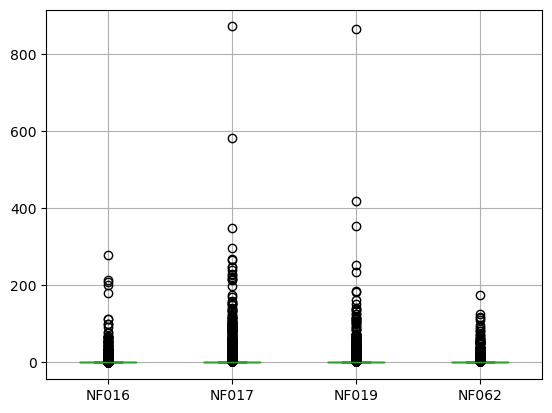

In [20]:
df_clustering.boxplot(column=['NF016', 'NF017', 'NF019', 'NF062'])
plt.show()


In [21]:
df_clustering = df_clustering.loc[(df_clustering["NF016"]<=500) 
                                  & (df_clustering["NF017"]<=500) 
                                  & (df_clustering["NF019"]<=500) 
                                  & (df_clustering["NF062"]<=500), :]

df_clustering

,ruc,NF016,NF017,NF019,NF062
0,EC-RUC-0100109164001-267709,0,1,0,0
1,EC-RUC-0100334853001-505174,0,1,0,0
2,EC-RUC-0100412402001-1019036,0,0,1,0
3,EC-RUC-0100643014001-47366,0,42,0,0
4,EC-RUC-0100692649001-50672,0,0,1,1
...,...,...,...,...,...
16223,ID-2100403993001-856304,0,1,0,0
16224,ID-2100974753001-850663,0,0,1,1
16225,ID-A41050113-543631,0,0,1,0
16226,ID-B85173136-991809,0,0,0,0


In [22]:
X = df_clustering.iloc[:,1:]

In [23]:
vector = np.arange(1,11)

In [24]:
vector

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [25]:
inercias = []
for k in vector:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inercias.append(kmeans.inertia_)

In [26]:
inercias

[3852619.1107481737,
 2293384.0244124467,
 1852760.5459325206,
 1550292.1893115968,
 1295454.5579466757,
 1074569.104832975,
 929758.0889566704,
 834905.8597184925,
 719055.5005607123,
 639005.2988597124]

In [27]:
dfg = pd.DataFrame({"k":vector,"inercia":inercias})
dfg.head()

,k,inercia
0,1,3.852619e+06
1,2,2.293384e+06
2,3,1.852761e+06
3,4,1.550292e+06
4,5,1.295455e+06


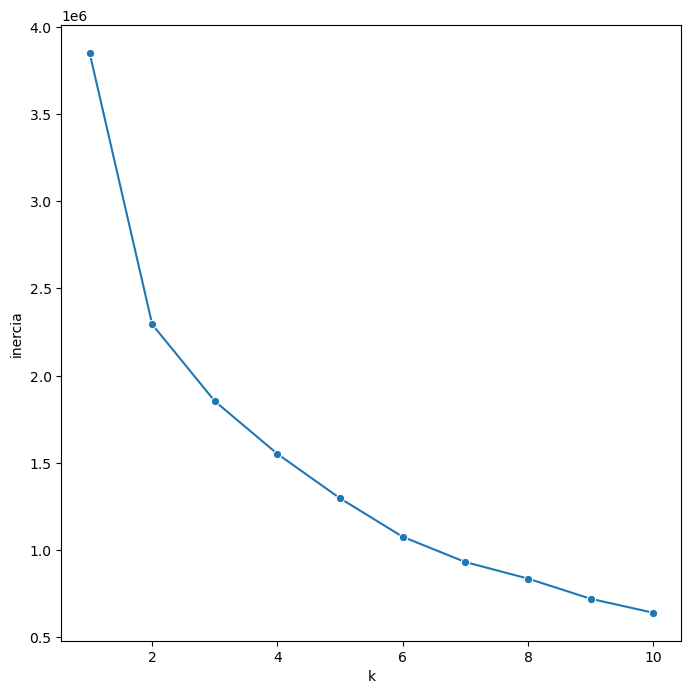

In [28]:
fig,ax = plt.subplots(figsize=(8,8))
sns.lineplot(data=dfg,x="k",marker="o",y="inercia",ax=ax)
plt.show()

In [29]:
k=2
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [30]:
kmeans.n_iter_

5

In [31]:
kmeans.cluster_centers_

array([[4.80635551e-01, 1.04369414e+00, 1.25657895e+00, 9.05908640e-01],
       [1.66533454e-16, 1.06780702e+02, 4.89912281e+01, 1.86578947e+01]])

In [32]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
df_clustering["cluster"] = kmeans.labels_

C:\Users\DELL\AppData\Local\Temp\ipykernel_21268\3251967166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering["cluster"] = kmeans.labels_


In [34]:
df_clustering

,ruc,NF016,NF017,NF019,NF062,cluster
0,EC-RUC-0100109164001-267709,0,1,0,0,0
1,EC-RUC-0100334853001-505174,0,1,0,0,0
2,EC-RUC-0100412402001-1019036,0,0,1,0,0
3,EC-RUC-0100643014001-47366,0,42,0,0,0
4,EC-RUC-0100692649001-50672,0,0,1,1,0
...,...,...,...,...,...,...
16223,ID-2100403993001-856304,0,1,0,0,0
16224,ID-2100974753001-850663,0,0,1,1,0
16225,ID-A41050113-543631,0,0,1,0,0
16226,ID-B85173136-991809,0,0,0,0,0


In [35]:
df_clustering[df_clustering['NF016'] != 0]

,ruc,NF016,NF017,NF019,NF062,cluster
612,EC-RUC-0160000190001-30745,21,0,0,0,0
613,EC-RUC-0160000270001-2616,42,0,0,0,0
614,EC-RUC-0160000350001-89973,2,0,0,0,0
615,EC-RUC-0160000430001-12403,16,0,0,0,0
616,EC-RUC-0160000510001-8098,8,0,0,0,0
...,...,...,...,...,...,...
15999,EC-RUC-2360006130001-519694,6,0,0,0,0
16001,EC-RUC-2360006640001-530465,1,0,0,0,0
16007,EC-RUC-2360007880001-982966,6,0,0,0,0
16070,EC-RUC-2460001580001-369788,1,0,0,0,0


In [36]:
df_clustering[df_clustering['cluster'] == 0]

,ruc,NF016,NF017,NF019,NF062,cluster
0,EC-RUC-0100109164001-267709,0,1,0,0,0
1,EC-RUC-0100334853001-505174,0,1,0,0,0
2,EC-RUC-0100412402001-1019036,0,0,1,0,0
3,EC-RUC-0100643014001-47366,0,42,0,0,0
4,EC-RUC-0100692649001-50672,0,0,1,1,0
...,...,...,...,...,...,...
16223,ID-2100403993001-856304,0,1,0,0,0
16224,ID-2100974753001-850663,0,0,1,1,0
16225,ID-A41050113-543631,0,0,1,0,0
16226,ID-B85173136-991809,0,0,0,0,0


In [37]:
df_clustering[df_clustering['cluster'] == 1]

,ruc,NF016,NF017,NF019,NF062,cluster
19,EC-RUC-0101030153001-217141,0,46,75,0,1
170,EC-RUC-0102421989001-36322,0,89,1,0,1
331,EC-RUC-0103584421001-882717,0,71,0,0,1
462,EC-RUC-0104416755001-823540,0,151,0,0,1
809,EC-RUC-0190123626001-40900,0,0,420,0,1
...,...,...,...,...,...,...
15680,EC-RUC-2191715945001-256781,0,94,152,0,1
15699,EC-RUC-2191720558001-352818,0,150,56,0,1
16112,ID-0104626536001-854091,0,72,0,0,1
16191,ID-1791830105001-2928,0,157,127,98,1


## en el entrenamiento tenemos dos grupos, lo cual podemos definir como grupo de empresas envueltas en corrucion en los procesos de contratacion publica (1) , y empresas que han entrado en alguna categoria de una de las tres redflags pero que no se consideran corruptas devido a su bajo numeor de incidencias

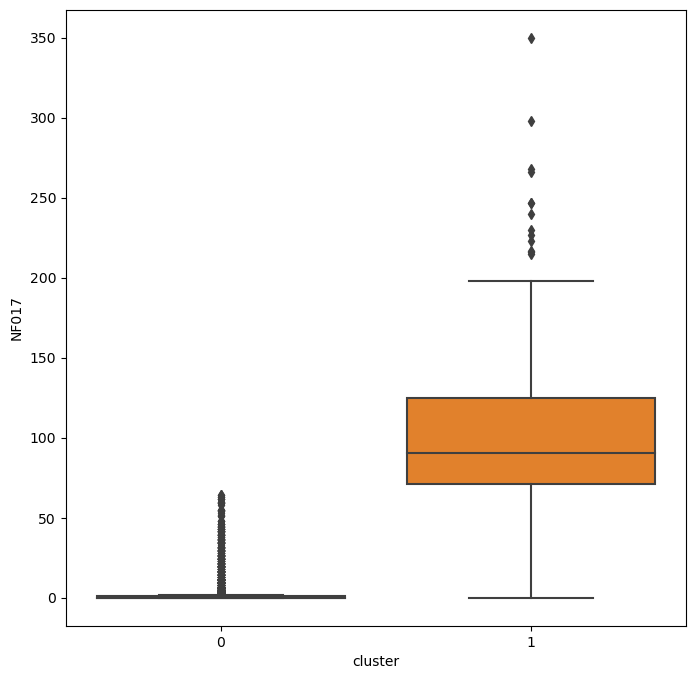

In [38]:
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(data=df_clustering, x="cluster", y="NF017")
plt.show()

### para la redflag NF017 (Que hace referencia a aquellas empresas y/o procesos de contratacion donde hubo aalteraciones en los precion de los servicios) vemos que gran parte de las enpresas pertece al grupo cero, estas tienen entre cero a 150 aproximadamente incidencias en este tipo de casos, es decir que se han visto envueltas entre cero y 200 veces en este tipo de redflag , y vemos que las del grupo 1 estan entre 0 a 400 incidencias en este tipo de redflag, es decir estas son las que mas veces se han visto envueltas en este tipo de casos de alteracion de los precios de los servicios en los procesos de contratacion

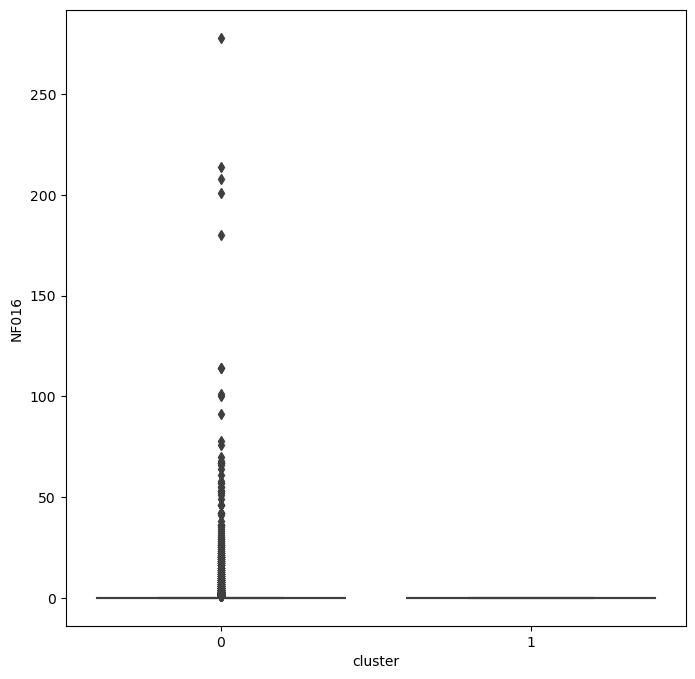

In [39]:
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(data=df_clustering, x="cluster", y="NF016")
plt.show()

### aqui apreciamos que todas las observaciones estan en el grupo cero de clustering, es decir que la redflag NF016 para este modelo en particular no es significativa o no tiene un peso para determinar si pertenece al grupo 1, vemos ademas que la gran mayoria tiene valores por debajo de 200 incidencias es decir que la mayoria de las empresas que cumplen con esta redflag  han tenido incidencias en este tipo de casos en su gran mayoria menores a 200 veces, vemnos que no hay ninguna para el grupo uno lo que indica que esta redflag no influye en el modelo ni al momneto de clasificar

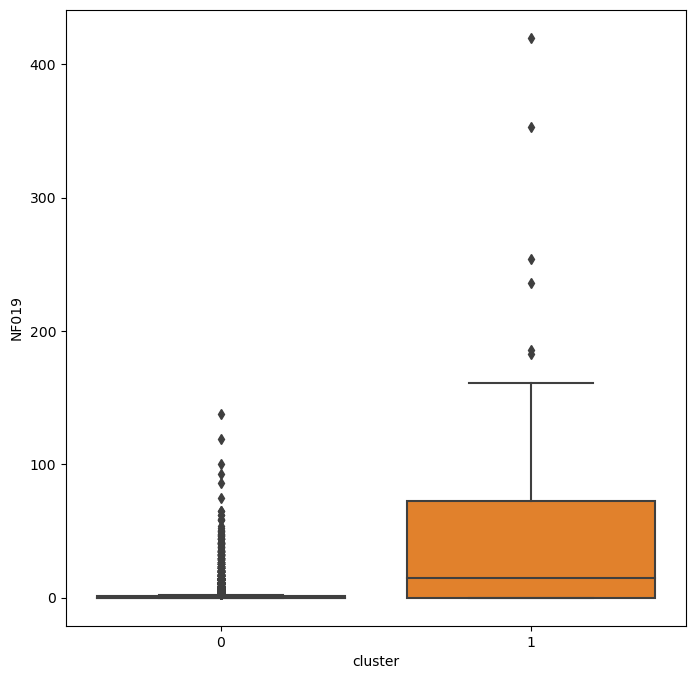

In [40]:

fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(data=df_clustering, x="cluster", y="NF019")
plt.show()

### esta redflag indica que tan competitivo fue un proceso de contratacion es decir evalua si la cantidad de oferentes que deberia a ver en un proceso de contratacion esta por debajo de la media, en este caso se evalua que empresas que resultaron ganadores del proceso de licitacion se vieron envueltas en casos de cprocesos poco competitivos, pues esto podria se un indicativo de que el proceso fue comprado con anteriordiad, en esta grafica vemos que para el grupo cero la mayoria de empresas tiene inicidencias en este tipo de proceso por debajo de las 200 veces es mas podemos observar como se apilan llegando al cero , por lo que se infiere que la mayor catidad de las empresas esta por debajo de la 150 veces en las que se vieron envueltas en procesos pocos competitivos
### Luego tenemos el grupo 1 donde vemos que el numero de incidencias es mayor a las 200 veces , por lo que se puede decir que aqui estan las que mas veces han sido participes de procesos de contratacion poco competitivos

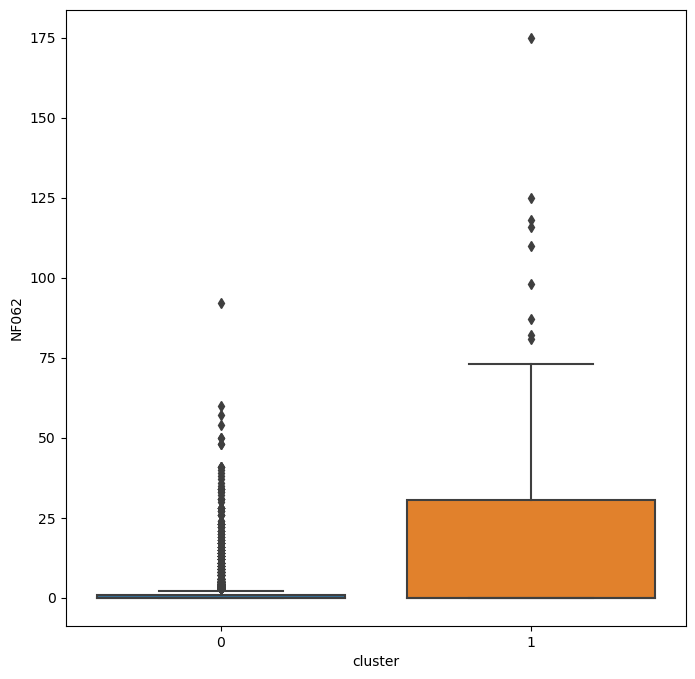

In [41]:
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(data=df_clustering, x="cluster", y="NF062")
plt.show()

## Esta redflag nos indica si el period de decicion en el proceso de contratación fue premeditado , pues la decicion de escoger estas esprecsas el tiempo fue menor al promedio por lo que es un indicativo de que hubo algun caso de extorcion o compra de la subasta al momento de realizar la contratacion , como podemos ver aqui gran parte que pertenece al grupo cero tienen incidencias de menos de 75 veces, podemos ver un valor por encima que podrian ser oulier, tenemos tambien empresar cuyas incidencias estan entre la 0 a las 125 veces, para esta su media esta entre 0y 30, lo que es un indicativo que posiblemente auqellas que empresas que tengan incidencias mayores a 100 si esten envueltas en algun proceso de corrupcion ya que estan muy alejada de la media, ya no es casualidad

In [42]:
sns.pairplot(data=df_clustering, hue="cluster", palette="tab10")


In [62]:
df_clustering[(df_clustering["NF016"]!=0)].iloc[:,1:].sum()

NF016      7744
NF017         0
NF019         0
NF062         0
cluster       0
dtype: int64

## aqui podemos observar el comportamiento de los dos grupos cada par de entradas en este caso las redflag, vemos como para la NF016 Nno hay mayor alteracion debido a que como se vio no influye de manera significativa en los grupos, si comparamos la NF016 con la NF017 o la NF019 vemos que no hay una relacion lineal ni de ningun tipo ya que cuando las empresas entran dentro de la NF016 (mayor a cero) la NF017 o NF019 son cero, en cuanto a NF017, NF019 y NF062 si que hay mas relacion y vemos como se forman los dos grupos dado la cantidad de incidencias que tenga una empresa en alguna de las dos redflags , entonces dado estos podemos decir que las empresa del grupo 1 son corruptas o fueron participes de un proceso de contratacion corrupto, mientras que las del grupo  no 

In [44]:
df_clustering

,ruc,NF016,NF017,NF019,NF062,cluster
0,EC-RUC-0100109164001-267709,0,1,0,0,0
1,EC-RUC-0100334853001-505174,0,1,0,0,0
2,EC-RUC-0100412402001-1019036,0,0,1,0,0
3,EC-RUC-0100643014001-47366,0,42,0,0,0
4,EC-RUC-0100692649001-50672,0,0,1,1,0
...,...,...,...,...,...,...
16223,ID-2100403993001-856304,0,1,0,0,0
16224,ID-2100974753001-850663,0,0,1,1,0
16225,ID-A41050113-543631,0,0,1,0,0
16226,ID-B85173136-991809,0,0,0,0,0


In [45]:
for centroid in df_clustering["cluster"].unique():
    print("Grupo", centroid, "-> ", df_clustering.loc[df_clustering["cluster"]==centroid].shape[0])


Grupo 0 ->  16112
Grupo 1 ->  114


In [63]:
df_clustering["cluster"].unique()

array([0, 1])

In [64]:
%matplotlib notebook
plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
#fg = ax.scatter3D(df_clustering.loc[df_clustering["cluster"]==2,"NF016"], 
#                  df_clustering.loc[df_clustering["cluster"]==2, "NF017"], 
#                  df_clustering.loc[df_clustering["cluster"]==2, "NF019"],
#                  s=df_clustering["..."]  # tamaño de los puntos acorde al valor de la columna
#                 c=df_clustering.loc[df_clustering["cluster"]==2, "cluster"])

#fg = ax.scatter3D(df_clustering["NF016"], 
#                  df_clustering["NF017"], 
#                  df_clustering["NF019"],
#                  s=df_clustering["..."]  # tamaño de los puntos acorde al valor de la columna
#                  c=df_clustering["cluster"])
colors = ['blue', 'black', 'yellow', 'red', 'gray']
for i in range(len(df_clustering["cluster"].unique())):
    ax.scatter(df_clustering["NF016"].loc[df_clustering["cluster"]==i], 
               df_clustering["NF017"].loc[df_clustering["cluster"]==i], 
               df_clustering["NF019"].loc[df_clustering["cluster"]==i], 
               c=colors[i])


ax.set_xlabel("NF016")
ax.set_ylabel("NF017")
ax.set_zlabel("NF019")
#plt.colorbar(fg)

<IPython.core.display.Javascript object>

Text(0.5, 0, 'NF019')

In [48]:
%matplotlib notebook
plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
colors = ['blue', 'black', 'yellow', 'red', 'gray']
for i in range(len(df_clustering["cluster"].unique())):
    ax.scatter(df_clustering["NF062"].loc[df_clustering["cluster"]==i], 
               df_clustering["NF017"].loc[df_clustering["cluster"]==i], 
               df_clustering["NF019"].loc[df_clustering["cluster"]==i], 
               c=colors[i])


ax.set_xlabel("NF062")
ax.set_ylabel("NF017")
ax.set_zlabel("NF019")
#0: b, 1: k, 2: y

<IPython.core.display.Javascript object>

Text(0.5, 0, 'NF019')

In [49]:
%matplotlib notebook
plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
colors = ['blue', 'black', 'yellow', 'red', 'gray']
for i in range(len(df_clustering["cluster"].unique())):
    ax.scatter(df_clustering["NF062"].loc[df_clustering["cluster"]==i], 
               df_clustering["NF016"].loc[df_clustering["cluster"]==i], 
               df_clustering["NF019"].loc[df_clustering["cluster"]==i], 
               c=colors[i])


ax.set_xlabel("NF062")
ax.set_ylabel("NF017")
ax.set_zlabel("NF019")

<IPython.core.display.Javascript object>

Text(0.5, 0, 'NF019')

In [50]:
%matplotlib notebook
plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
colors = ['blue', 'black', 'yellow', 'red', 'gray']
for i in range(len(df_clustering["cluster"].unique())):
    ax.scatter(df_clustering["NF062"].loc[df_clustering["cluster"]==i], 
               df_clustering["NF016"].loc[df_clustering["cluster"]==i], 
               df_clustering["NF017"].loc[df_clustering["cluster"]==i], 
               c=colors[i])


ax.set_xlabel("NF062")
ax.set_ylabel("NF017")
ax.set_zlabel("NF019")

<IPython.core.display.Javascript object>

Text(0.5, 0, 'NF019')

# Save Data Clustering

In [51]:
from __init__ import *

name_csv = "cluster_data.csv"
df_clustering.to_csv(url_proyect + '\\data\\data_for_supervised_model\\' + name_csv, index=False)